In [622]:
#pip install citipy

In [631]:
from citipy import citipy
from random import uniform
import requests, json
from config import api_key
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [632]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=20)

In [633]:
cities = []
lats_random = []
for i in range(1, 10):
    lat_coord  = round(uniform(-60,75), 2)                        # Note that I limit the latitude range a little. 
    long_coord = round(uniform(-180, 180), 2)                     # Antarctica and deep arctic aren't very useful and
    city = citipy.nearest_city(lat_coord, long_coord).city_name   # skew the results.
    cities.append(city)
    lats_random.append(lat_coord)
    #print (f"{i}: {city}")


In [634]:
initial_city_list_df = pd.DataFrame({"Cities" : cities})
clean_initial_city_list_df= initial_city_list_df.drop_duplicates(subset ="Cities",
                     keep = 'first').reset_index(drop=True)
clean_initial_city_list_df

,Cities
0,thompson
1,albany
2,hofn
3,busselton
4,seoul
5,newport
6,tuatapere
7,saldanha
8,skjervoy


In [635]:
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# set up lists to hold reponse info

lats = []
temps = []
humids = []
cloudies = []
wind_speeds = []
i = 1
# Loop through the list of cities and perform a request for data on each
for city in clean_initial_city_list_df['Cities']:   
    response = requests.get(query_url + city).json()
    try:
        lat = response['coord']['lat']
        temp = round(response['main']['temp'])
        humid = response['main']['humidity']
        cloud = response['clouds']['all']
        wind = response['wind']['speed']
    except KeyError:
        temp = np.nan
        humid = np.nan
        cloud = np.nan
        wind = np.nan
    lats.append(lat)
    temps.append(temp)
    humids.append(humid)
    cloudies.append(cloud)
    wind_speeds.append(wind)
    print (f"{i}: {city} lat: {lat}, temp: {temp}, humidity: {humid}, cloudiness: {cloud}, wind speed: {wind}")
    i+=1
#print (response)

1: thompson lat: 55.7435, temp: -4, humidity: 74, cloudiness: 90, wind speed: 7.2
2: albany lat: 42.6001, temp: 4, humidity: 35, cloudiness: 100, wind speed: 0.45
3: hofn lat: 64.2539, temp: 6, humidity: 70, cloudiness: 75, wind speed: 2.06
4: busselton lat: -33.65, temp: 13, humidity: 81, cloudiness: 97, wind speed: 0.89
5: seoul lat: 37.5683, temp: 16, humidity: 67, cloudiness: 90, wind speed: 2.57
6: newport lat: 51.5877, temp: 10, humidity: 57, cloudiness: 0, wind speed: 3.6
7: tuatapere lat: -46.1333, temp: 7, humidity: 97, cloudiness: 99, wind speed: 1.34
8: saldanha lat: -33.0117, temp: 14, humidity: 88, cloudiness: 0, wind speed: 0.51
9: skjervoy lat: 70.0311, temp: 2, humidity: 55, cloudiness: 75, wind speed: 3.09


In [644]:
weather_data_df = pd.DataFrame({"City" : clean_initial_city_list_df['Cities'],
                             "Latitude": lats,
                               "Degrees From Equator": list(map(abs, lats)),
                               "Temperature" : temps,
                               "Humidity" : humids,
                               "Cloudiness" : cloudies,
                               "Wind Speed" : wind_speeds
                              })
weather_data_df


,City,Latitude,Degrees From Equator,Temperature,Humidity,Cloudiness,Wind Speed
0,thompson,55.7435,55.7435,-4,74,90,7.20
1,albany,42.6001,42.6001,4,35,100,0.45
2,hofn,64.2539,64.2539,6,70,75,2.06
3,busselton,-33.6500,33.6500,13,81,97,0.89
4,seoul,37.5683,37.5683,16,67,90,2.57
5,newport,51.5877,51.5877,10,57,0,3.60
6,tuatapere,-46.1333,46.1333,7,97,99,1.34
7,saldanha,-33.0117,33.0117,14,88,0,0.51
8,skjervoy,70.0311,70.0311,2,55,75,3.09


In [651]:
clean_weather_data_df= weather_data_df.dropna(how='any', axis=0)

clean_weather_data_df= weather_data_df.drop_duplicates(subset ="City",
                     keep = 'first').reset_index(drop=True)

# Save the dataframe above to .csv file
clean_weather_data_df.to_csv("weather-data.csv", index=False)

clean_weather_data_df

,City,Latitude,Degrees From Equator,Temperature,Humidity,Cloudiness,Wind Speed
0,thompson,55.7435,55.7435,-4,74,90,7.20
1,albany,42.6001,42.6001,4,35,100,0.45
2,hofn,64.2539,64.2539,6,70,75,2.06
3,busselton,-33.6500,33.6500,13,81,97,0.89
4,seoul,37.5683,37.5683,16,67,90,2.57
5,newport,51.5877,51.5877,10,57,0,3.60
6,tuatapere,-46.1333,46.1333,7,97,99,1.34
7,saldanha,-33.0117,33.0117,14,88,0,0.51
8,skjervoy,70.0311,70.0311,2,55,75,3.09


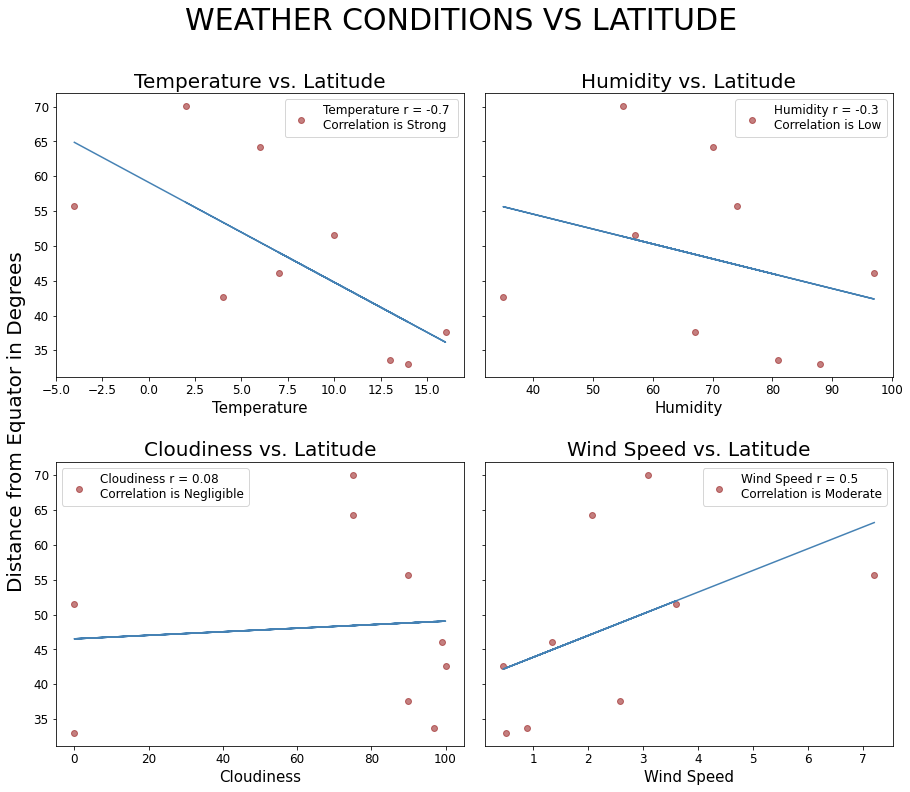

In [690]:
                # PLOTTING WEATHER CONDITIONS VS. LATITUDE USING A FOR LOOP

# Set up list of variables to compare with latitude

master_plot_list = ["Temperature", "Humidity", "Cloudiness", "Wind Speed"]

    
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, sharey='row', figsize=(15,12))

plot_list = [ax0, ax1, ax2, ax3]
plt.subplots_adjust(hspace=.3, wspace=0.05)
fig.suptitle('WEATHER CONDITIONS VS LATITUDE', ha='center') 

fig.text(.08, .5, "Distance from Equator in Degrees\n" " ", va='center', rotation='vertical', fontsize=20, linespacing = 2)  

for i in range (4):   

    x_axis_name = master_plot_list[i]                           # Set name of x axis for the sake of labels
    x_axis = clean_lat_vs_temp_df[x_axis_name]                  # Set up x axis values 
    y_axis = clean_lat_vs_temp_df["Degrees From Equator"]       # Set up y axis values 

    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_axis, y_axis)  # Get elements of regression equation
    regress_values = x_axis * slope + intercept                 # Calculate regression values
              
    plot_list[i].set_xlabel(f"{x_axis_name}")                   

    plot_list[i].set_title(f"{x_axis_name} vs. Latitude")  
    
    r = round(stats.pearsonr(x_axis, y_axis)[0],2)
    if abs(r) >=.8 : r_label = "Very Strong"
    elif abs(r) >=.6 : r_label = "Strong"
    elif abs(r) >= .4 : r_label = "Moderate"
    elif abs(r) >= .2 : r_label = "Low"
    else: r_label = "Negligible"

    plot_list[i].scatter(x_axis, y_axis, facecolors="darkred",  alpha=.5, 
                         label=f"{x_axis_name} r = {r} \nCorrelation is {r_label}")                                                 

    plot_list[i].plot(x_axis, regress_values, color="steelblue")         # Plot the regression line
    plot_list[i].legend()
  
plt.savefig("weather-conditions-vs-latitude.png")

plt.show()


                                                    CONCLUSIONS
As you can see from the charts above, the correlation between temperature and distance from the equator (i.e., positive and negative latitudes) is very strong, supporting the assertion that climates get warmer as you get closer to the equator. 

All other weather conditions (humidity, cloudiness and wind speed) have negligible correlations. 

In [640]:
north_hem_df = clean_lat_vs_temp_df.loc[clean_lat_vs_temp_df['Latitude'] > 0, ].reset_index(drop=True)
north_hem_df

,City,Latitude,Degrees From Equator,Temperature,Humidity,Cloudiness,Wind Speed
0,thompson,55.7435,55.7435,-4,74,90,7.20
1,albany,42.6001,42.6001,4,35,100,0.45
2,hofn,64.2539,64.2539,6,70,75,2.06
3,seoul,37.5683,37.5683,16,67,90,2.57
4,newport,51.5877,51.5877,10,57,0,3.60
5,skjervoy,70.0311,70.0311,2,55,75,3.09


In [641]:
south_hem_df = clean_lat_vs_temp_df.loc[clean_lat_vs_temp_df['Latitude'] <= 0, ].reset_index(drop=True)
south_hem_df

,City,Latitude,Degrees From Equator,Temperature,Humidity,Cloudiness,Wind Speed
0,busselton,-33.6500,33.6500,13,81,97,0.89
1,tuatapere,-46.1333,46.1333,7,97,99,1.34
2,saldanha,-33.0117,33.0117,14,88,0,0.51


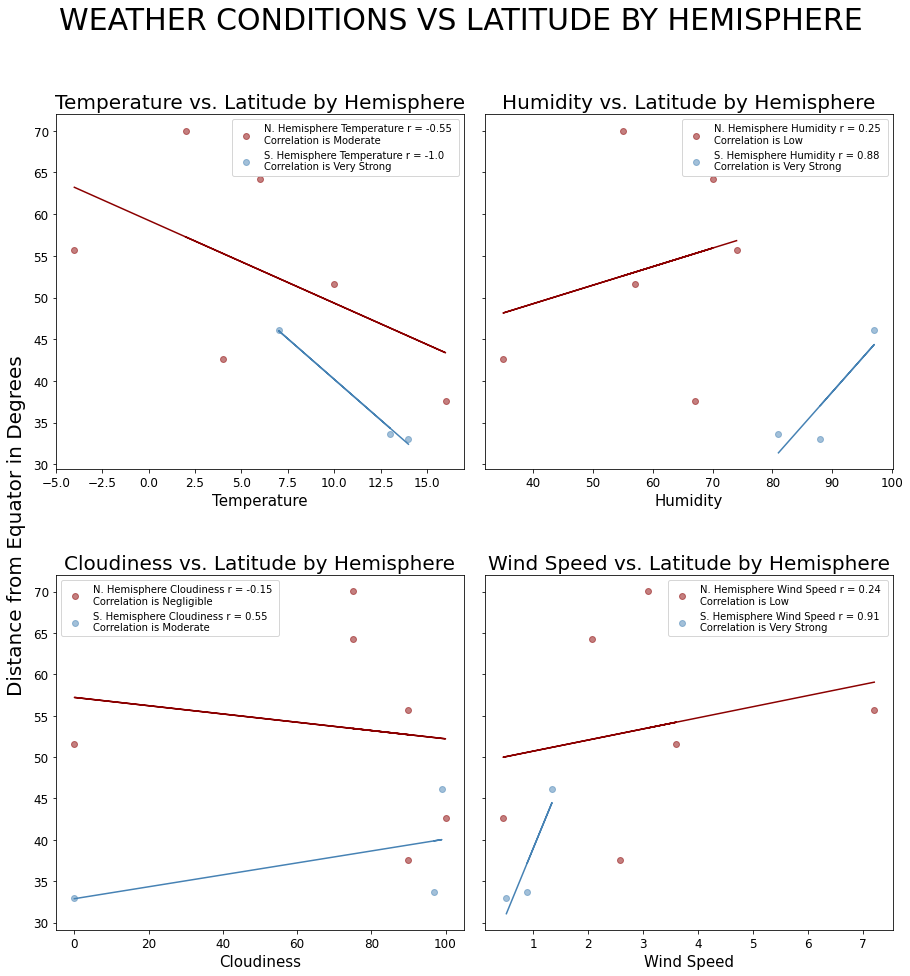

In [705]:
        # PLOTTING WEATHER CONDITIONS BY HEMISPHERE VS. LATITUDE USING A FOR LOOP

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, sharey='row', figsize=(15,15))
#fig = plt.figure()
#fig.set_size_inches() 
fig.text(.08, 0.5, "Distance from Equator in Degrees", va='center', rotation='vertical', fontsize=20)

plot_list = [ax0, ax1, ax2, ax3]
plt.subplots_adjust(hspace=.3, wspace=0.05)
fig.suptitle('WEATHER CONDITIONS VS LATITUDE BY HEMISPHERE', ha='center') 
#ax0.set_ylabel("Distance from Equator in Degrees")

axs_toplot ={}

def r_label(r):
    abs_r = abs(r)
    if abs_r >= .8 : return "Very Strong"
    elif abs_r >= .6 : return "Strong"
    elif abs_r >= .4: return "Moderate"
    elif abs_r >= .2: return "Low"
    else: return "Negligible"

for i in range (4):   

        # Northern Hemisphere
    north_x_axis_name = master_plot_list[i]                           # Set name of x axis for the sake of labels
    north_x_axis = north_hem_df[north_x_axis_name]                          # Set up x axis values 
    north_y_axis = north_hem_df["Degrees From Equator"]               # Set up y axis values 

    slope, intercept, rvalue, pvalue, stderr = stats.linregress(north_x_axis, north_y_axis)  # Get elements of regression equation
    north_regress_values = north_x_axis * slope + intercept                 # Calculate regression values

    north_r = round(stats.pearsonr(north_x_axis, north_y_axis)[0],2)
    
    north_r_label = r_label(north_r)
    
        # Southern Hemisphere
    south_x_axis_name = master_plot_list[i]                           # Set name of x axis for the sake of labels
    south_x_axis = south_hem_df[south_x_axis_name]                          # Set up x axis values 
    south_y_axis = south_hem_df["Degrees From Equator"]               # Set up y axis values 
    
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(south_x_axis, south_y_axis)  # Get elements of regression equation
    south_regress_values = south_x_axis * slope + intercept                 # Calculate regression values   
    
    south_r = round(stats.pearsonr(south_x_axis, south_y_axis)[0],2)
    
    south_r_label = r_label(south_r)
    
    
    # Formatting
    plot_list[i].set_xlabel(f"{north_x_axis_name}")                   

    plot_list[i].set_title(f"{north_x_axis_name} vs. Latitude by Hemisphere")  
     
        
    # lotting
        # Northern Hemisphere
    plot_list[i].scatter(north_x_axis, north_y_axis, facecolors="darkred",  alpha=.5, 
                         label=f"N. Hemisphere {north_x_axis_name} r = {north_r} \nCorrelation is {north_r_label}")                                                 

    plot_list[i].plot(north_x_axis, north_regress_values, color="darkred")         # Plot the regression line
    
        # Southern Hemisphere
    plot_list[i].scatter(south_x_axis, south_y_axis, facecolors="steelblue",  alpha=.5,
                         label=f"S. Hemisphere {south_x_axis_name} r = {south_r} \nCorrelation is {south_r_label}")                                                 

    plot_list[i].plot(south_x_axis, south_regress_values, color="steelblue")         # Plot the regression line    
       
    plot_list[i].legend(fontsize=10)
    
plt.savefig("weather-conditions-vs-latitude-by-hemisphere.png")

plt.show()


This analysis by hemisphere doesn't change the initial results. Temperature is still the only weather variable that has a strong correlation to latitude, although the correlation is a little stronger in southern hemisphere compareed to the north. 

The only other observable difference is that the Wind speed correlation in the Northern Hemisphere is low, versus negligable in the Southern Hemisphere

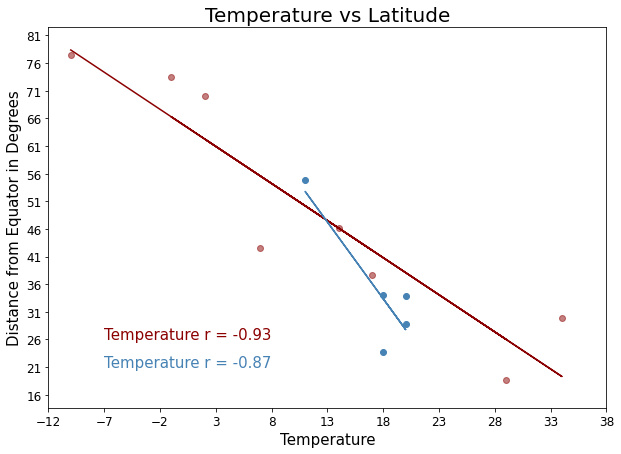

In [422]:
                                    # TEMPERATURE VS LATITUDE BY HEMISPHERE
# Data & calculations

    # Northern Hemisphere
north_x_axis_name = master_plot_list[0]                           # Set name of x axis for the sake of labels
north_x_axis = north_hem_df[north_x_axis_name]                          # Set up x axis values 
north_y_axis = north_hem_df["Degrees From Equator"]               # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(north_x_axis, north_y_axis)  # Get elements of regression equation
north_regress_values = north_x_axis * slope + intercept                 # Calculate regression values

    # Southern Hemisphere
south_x_axis_name = master_plot_list[0]                           # Set name of x axis for the sake of labels
south_x_axis = south_hem_df[south_x_axis_name]                          # Set up x axis values 
south_y_axis = south_hem_df["Degrees From Equator"]               # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(south_x_axis, south_y_axis)  # Get elements of regression equation
south_regress_values = south_x_axis * slope + intercept                 # Calculate regression values

# Formating

plt.figure(figsize=(10, 7))                                       # Set up figure size a little larger than default                    
plt.xlabel(f"{north_x_axis_name}")                                # Set x axis label                              
plt.ylabel("Distance from Equator in Degrees")                    # Set y axis label
plt.title(f"{north_x_axis_name} vs Latitude")                     # Set chart title
plt.xlim(north_x_axis.min()-2, north_x_axis.max()+2)              # Give chart some white space at margins
plt.ylim(north_y_axis.min()-5, north_y_axis.max()+5)
plt.xticks(range(int(north_x_axis.min()-2),                       # Set up ticks on the x axis 
                 int(north_x_axis.max())+5,5), rotation=0 )  
plt.yticks(range(int(north_y_axis.min()-2),                       # Set up ticks on the y axis
                 int(north_y_axis.max())+5,5), rotation=0 )
     
# Plotting 

    # Northern Hemisphere
plt.scatter(north_x_axis, north_y_axis, facecolors="darkred",  alpha=.5) # Plot the scatter chart
plt.annotate(f"{north_x_axis_name} r = {round(stats.pearsonr(north_x_axis, north_y_axis)[0],2)}", # Plot the correlation coeficient
             (-7,26), fontsize=15, color="darkred")                                                   

plt.plot(north_x_axis, north_regress_values, color="darkred")         # Plot the regression line

    # Southern Hemisphere
plt.scatter(south_x_axis, south_y_axis, facecolors="steelblue",  alpha=1) # Plot the scatter chart
plt.annotate(f"{south_x_axis_name} r = {round(stats.pearsonr(south_x_axis, south_y_axis)[0],2)}", # Plot the correlation coeficient
             (-7,21), fontsize=15, color="steelblue")                                                   

plt.plot(south_x_axis, south_regress_values, color="steelblue")         # Plot the regression line



plt.show()


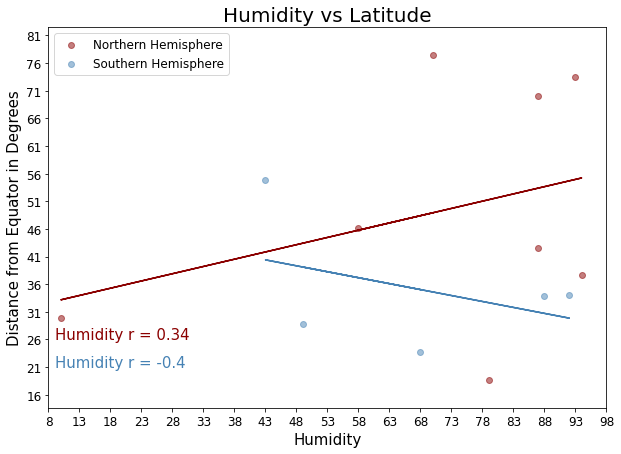

In [449]:
                                    # HUMIDITY VS LATITUDE BY HEMISPHERE
# Data & calculations

    # Northern Hemisphere
north_x_axis_name = master_plot_list[1]                           # Set name of x axis for the sake of labels
north_x_axis = north_hem_df[north_x_axis_name]                          # Set up x axis values 
north_y_axis = north_hem_df["Degrees From Equator"]               # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(north_x_axis, north_y_axis)  # Get elements of regression equation
north_regress_values = north_x_axis * slope + intercept                 # Calculate regression values

    # Southern Hemisphere
south_x_axis_name = master_plot_list[1]                           # Set name of x axis for the sake of labels
south_x_axis = south_hem_df[south_x_axis_name]                          # Set up x axis values 
south_y_axis = south_hem_df["Degrees From Equator"]               # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(south_x_axis, south_y_axis)  # Get elements of regression equation
south_regress_values = south_x_axis * slope + intercept                 # Calculate regression values

# Formating

fig, ax = plt.subplots()                                          # Set up subplots to make the legend easier to create
fig.set_size_inches(10, 7)                                        # Set up figure size a little larger than default                    
plt.xlabel(f"{north_x_axis_name}")                                # Set x axis label                              
plt.ylabel("Distance from Equator in Degrees")                    # Set y axis label
plt.title(f"{north_x_axis_name} vs Latitude")                     # Set chart title
plt.xlim(north_x_axis.min(), north_x_axis.max())                    # Give chart some white space at margins
plt.ylim(north_y_axis.min()-5, north_y_axis.max()+5)
plt.xticks(range(int(north_x_axis.min()-2),                       # Set up ticks on the x axis 
                 int(north_x_axis.max())+5,5), rotation=0 )  
plt.yticks(range(int(north_y_axis.min()-2),                       # Set up ticks on the y axis
                 int(north_y_axis.max())+5,5), rotation=0 )
# Plotting 

    # Northern Hemisphere
ax.scatter(north_x_axis, north_y_axis, facecolors="darkred",  alpha=.5, label='Northern Hemisphere') # Plot the scatter chart
ax.annotate(f"{north_x_axis_name} r = {round(stats.pearsonr(north_x_axis, north_y_axis)[0],2)}", # Plot the correlation coeficient
             (9,26), fontsize=15, color="darkred")                                                   

ax.plot(north_x_axis, north_regress_values, color="darkred")         # Plot the regression line

    # Southern Hemisphere
ax.scatter(south_x_axis, south_y_axis, facecolors="steelblue",  alpha=.5, label='Southern Hemisphere') # Plot the scatter chart
ax.annotate(f"{south_x_axis_name} r = {round(stats.pearsonr(south_x_axis, south_y_axis)[0],2)}", # Plot the correlation coeficient
             (9,21), fontsize=15, color="steelblue")                                                   

ax.plot(south_x_axis, south_regress_values, color="steelblue")         # Plot the regression line

plt.legend()                                                           # Add the legend
plt.show()



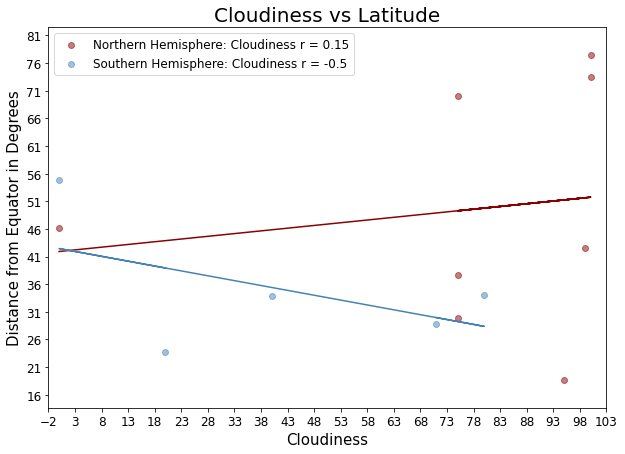

In [455]:
                                    # CLOUDINESS VS LATITUDE BY HEMISPHERE
# Data & calculations

    # Northern Hemisphere
north_x_axis_name = master_plot_list[2]                           # Set name of x axis for the sake of labels
north_x_axis = north_hem_df[north_x_axis_name]                          # Set up x axis values 
north_y_axis = north_hem_df["Degrees From Equator"]               # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(north_x_axis, north_y_axis)  # Get elements of regression equation
north_regress_values = north_x_axis * slope + intercept                 # Calculate regression values

    # Southern Hemisphere
south_x_axis_name = master_plot_list[2]                           # Set name of x axis for the sake of labels
south_x_axis = south_hem_df[south_x_axis_name]                          # Set up x axis values 
south_y_axis = south_hem_df["Degrees From Equator"]               # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(south_x_axis, south_y_axis)  # Get elements of regression equation
south_regress_values = south_x_axis * slope + intercept                 # Calculate regression values

# Formating

fig, ax = plt.subplots()                                          # Set up subplots to make the legend easier to create
fig.set_size_inches(10, 7)                                        # Set up figure size a little larger than default                    
plt.xlabel(f"{north_x_axis_name}")                                # Set x axis label                              
plt.ylabel("Distance from Equator in Degrees")                    # Set y axis label
plt.title(f"{north_x_axis_name} vs Latitude")                     # Set chart title
plt.xlim(north_x_axis.min(), north_x_axis.max())                    # Give chart some white space at margins
plt.ylim(north_y_axis.min()-5, north_y_axis.max()+5)
plt.xticks(range(int(north_x_axis.min()-2),                       # Set up ticks on the x axis 
                 int(north_x_axis.max())+5,5), rotation=0 )  
plt.yticks(range(int(north_y_axis.min()-2),                       # Set up ticks on the y axis
                 int(north_y_axis.max())+5,5), rotation=0 )
# Plotting 

    # Northern Hemisphere
ax.scatter(north_x_axis, north_y_axis, facecolors="darkred",  alpha=.5,  # Plot the scatter chart
           label=f"Northern Hemisphere: {north_x_axis_name} r = {round(stats.pearsonr(north_x_axis, north_y_axis)[0],2)}")                                                  

ax.plot(north_x_axis, north_regress_values, color="darkred")       # Plot the regression line

    # Southern Hemisphere
ax.scatter(south_x_axis, south_y_axis, facecolors="steelblue",  alpha=.5, # Plot the scatter chart
           label=f"Southern Hemisphere: {south_x_axis_name} r = {round(stats.pearsonr(south_x_axis, south_y_axis)[0],2)}")                                                 

ax.plot(south_x_axis, south_regress_values, color="steelblue")     # Plot the regression line

plt.legend()                                                       # Add the legend
plt.show()



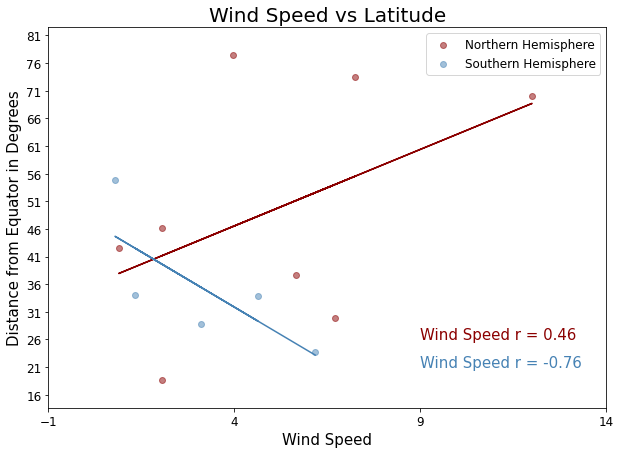

In [447]:
                                    # WIND SPEED VS LATITUDE BY HEMISPHERE
# Data & calculations

    # Northern Hemisphere
north_x_axis_name = master_plot_list[3]                           # Set name of x axis for the sake of labels
north_x_axis = north_hem_df[north_x_axis_name]                          # Set up x axis values 
north_y_axis = north_hem_df["Degrees From Equator"]               # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(north_x_axis, north_y_axis)  # Get elements of regression equation
north_regress_values = north_x_axis * slope + intercept                 # Calculate regression values

    # Southern Hemisphere
south_x_axis_name = master_plot_list[3]                           # Set name of x axis for the sake of labels
south_x_axis = south_hem_df[south_x_axis_name]                          # Set up x axis values 
south_y_axis = south_hem_df["Degrees From Equator"]               # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(south_x_axis, south_y_axis)  # Get elements of regression equation
south_regress_values = south_x_axis * slope + intercept                 # Calculate regression values

# Formating

fig, ax = plt.subplots()                                          # Set up subplots to make the legend easier to create
fig.set_size_inches(10, 7)                                        # Set up figure size a little larger than default                    
plt.xlabel(f"{north_x_axis_name}")                                # Set x axis label                              
plt.ylabel("Distance from Equator in Degrees")                    # Set y axis label
plt.title(f"{north_x_axis_name} vs Latitude")                     # Set chart title
plt.xlim(north_x_axis.min(), north_x_axis.max())                    # Give chart some white space at margins
plt.ylim(north_y_axis.min()-5, north_y_axis.max()+5)
plt.xticks(range(int(north_x_axis.min()-2),                       # Set up ticks on the x axis 
                 int(north_x_axis.max())+5,5), rotation=0 )  
plt.yticks(range(int(north_y_axis.min()-2),                       # Set up ticks on the y axis
                 int(north_y_axis.max())+5,5), rotation=0 )
# Plotting 

    # Northern Hemisphere
ax.scatter(north_x_axis, north_y_axis, facecolors="darkred",  alpha=.5, label='Northern Hemisphere') # Plot the scatter chart
ax.annotate(f"{north_x_axis_name} r = {round(stats.pearsonr(north_x_axis, north_y_axis)[0],2)}", # Plot the correlation coeficient
             (9,26), fontsize=15, color="darkred")                                                   

ax.plot(north_x_axis, north_regress_values, color="darkred")         # Plot the regression line

    # Southern Hemisphere
ax.scatter(south_x_axis, south_y_axis, facecolors="steelblue",  alpha=.5, label='Southern Hemisphere') # Plot the scatter chart
ax.annotate(f"{south_x_axis_name} r = {round(stats.pearsonr(south_x_axis, south_y_axis)[0],2)}", # Plot the correlation coeficient
             (9,21), fontsize=15, color="steelblue")                                                   

ax.plot(south_x_axis, south_regress_values, color="steelblue")         # Plot the regression line

plt.legend()                                                           # Add the legend
plt.show()


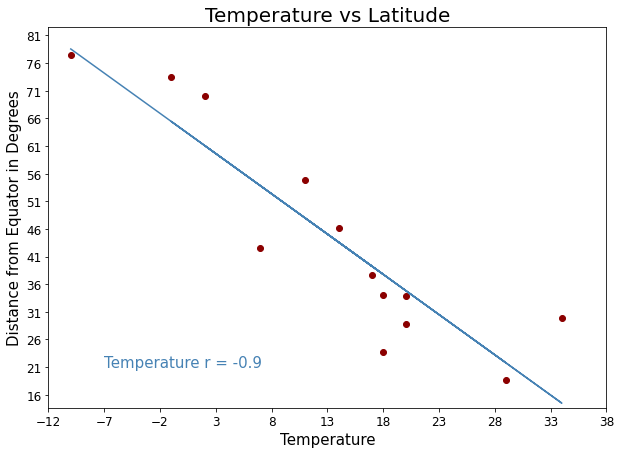

In [399]:
                                            # TEMPERATURE VS LATITUDE
# Data & calculations

x_axis_name = master_plot_list[0]                           # Set name of x axis for the sake of labels
x_axis = clean_lat_vs_temp_df[x_axis_name]                  # Set up x axis values 
y_axis = clean_lat_vs_temp_df["Degrees From Equator"]       # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_axis, y_axis)  # Get elements of regression equation
regress_values = x_axis * slope + intercept                 # Calculate regression values

# Formating

plt.figure(figsize=(10, 7))                                 # Set up figure size a little larger than default                    
plt.xlabel(f"{x_axis_name}")                                # Set x axis label                              
plt.ylabel("Distance from Equator in Degrees")              # Set y axis label
plt.title(f"{x_axis_name} vs Latitude")                     # Set chart title
plt.xlim(x_axis.min()-2, x_axis.max()+2)                    # Give chart some white space at margins
plt.ylim(y_axis.min()-5, y_axis.max()+5)
plt.xticks(range(int(x_axis.min()-2),                       # Set up ticks on the x axis 
                 int(x_axis.max())+5,5), rotation=0 )  
plt.yticks(range(int(y_axis.min()-2),                       # Set up ticks on the y axis
                 int(y_axis.max())+5,5), rotation=0 )
     
# Plotting 

plt.scatter(x_axis, y_axis, facecolors="darkred",  alpha=1) # Plot the scatter chart

plt.annotate(f"{x_axis_name} r = {round(stats.pearsonr(x_axis, y_axis)[0],2)}", # Plot the correlation coeficient
             (-7,21), fontsize=15, color="steelblue")                                                   

plt.plot(x_axis, regress_values, color="steelblue")         # Plot the regression line

plt.show()


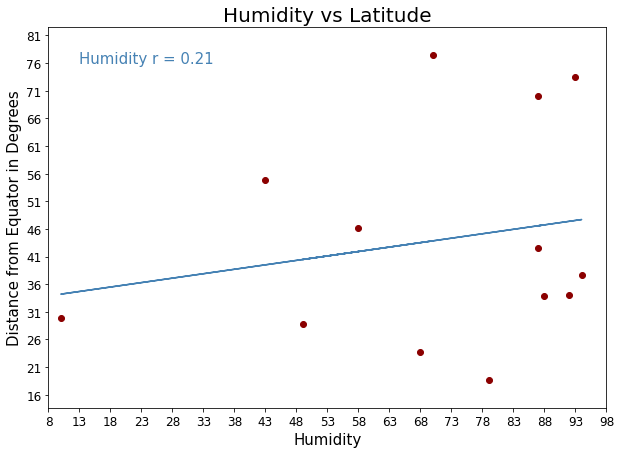

In [396]:
                                            # HUMIDITY VS LATITUDE
# Data & calculations

x_axis_name = master_plot_list[1]                           # Set name of x axis for the sake of labels
x_axis = clean_lat_vs_temp_df[x_axis_name]                  # Set up x axis values 
y_axis = clean_lat_vs_temp_df["Degrees From Equator"]       # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_axis, y_axis)  # Get elements of regression equation
regress_values = x_axis * slope + intercept                 # Calculate regression values

# Formating
plt.figure(figsize=(10, 7))                                 # Set up figure size a little larger than default                   
plt.xlabel(f"{x_axis_name}")                                # Set x axis label                              
plt.ylabel("Distance from Equator in Degrees")              # Set y axis label
plt.title(f"{x_axis_name} vs Latitude")                     # Set chart title
plt.xlim(x_axis.min()-2, x_axis.max()+2)                    # Give chart some white space at margins
plt.ylim(y_axis.min()-5, y_axis.max()+5)
plt.xticks(range(int(x_axis.min()-2),                       # Set up ticks on the x axis 
                 int(x_axis.max())+5,5), rotation=0 )  
plt.yticks(range(int(y_axis.min()-2),                       # Set up ticks on the y axis
                 int(y_axis.max())+5,5), rotation=0 )
     
# Plotting 

plt.scatter(x_axis, y_axis, facecolors="darkred",  alpha=1) # Plot the scatter chart

plt.annotate(f"{x_axis_name} r = {round(stats.pearsonr(x_axis, y_axis)[0],2)}", # Plot the correlation coeficient
             (13,76), fontsize=15, color="steelblue")                                                   

plt.plot(x_axis, regress_values, color="steelblue")         # Plot the regression line

plt.show()


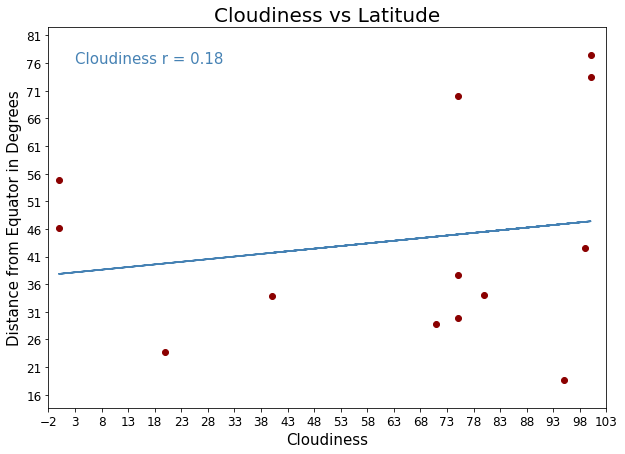

In [398]:
                                        # CLOUDINESS VS LATITUDE
# Data & calculations

x_axis_name = master_plot_list[2]                           # Set name of x axis for the sake of labels
x_axis = clean_lat_vs_temp_df[x_axis_name]                  # Set up x axis values 
y_axis = clean_lat_vs_temp_df["Degrees From Equator"]       # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_axis, y_axis)  # Get elements of regression equation
regress_values = x_axis * slope + intercept                 # Calculate regression values

# Formating
 
plt.figure(figsize=(10, 7))                                 # Set up figure size a little larger than default                   
plt.xlabel(f"{x_axis_name}")                                # Set x axis label                              
plt.ylabel("Distance from Equator in Degrees")              # Set y axis label
plt.title(f"{x_axis_name} vs Latitude")                     # Set chart title
plt.xlim(x_axis.min()-2, x_axis.max()+2)                    # Give chart some white space at margins
plt.ylim(y_axis.min()-5, y_axis.max()+5)
plt.xticks(range(int(x_axis.min()-2),                       # Set up ticks on the x axis 
                 int(x_axis.max())+5,5), rotation=0 )  
plt.yticks(range(int(y_axis.min()-2),                       # Set up ticks on the y axis
                 int(y_axis.max())+5,5), rotation=0 )
     
# Plotting 

plt.scatter(x_axis, y_axis, facecolors="darkred",  alpha=1) # Plot the scatter chart

plt.annotate(f"{x_axis_name} r = {round(stats.pearsonr(x_axis, y_axis)[0],2)}", # Plot the correlation coeficient
             (3,76), fontsize=15, color="steelblue")                                                   

plt.plot(x_axis, regress_values, color="steelblue")         # Plot the regression line

plt.show()


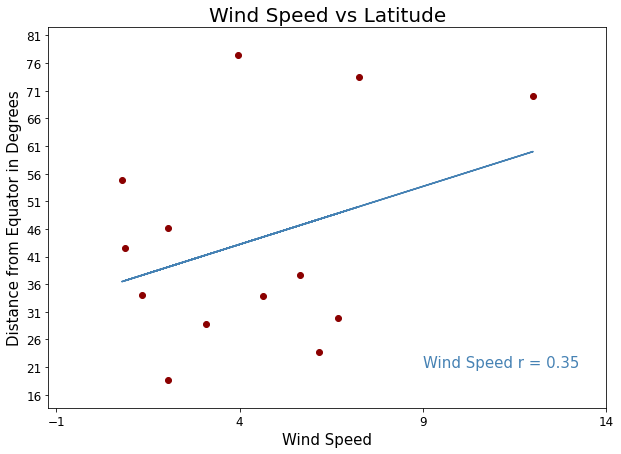

In [391]:
                                            # WIND SPEED VS LATITUDE
# Data & calculations

x_axis_name = master_plot_list[3]                           # Set name of x axis for the sake of labels
x_axis = clean_lat_vs_temp_df[x_axis_name]                  # Set up x axis values 
y_axis = clean_lat_vs_temp_df["Degrees From Equator"]       # Set up y axis values 

slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_axis, y_axis)  # Get elements of regression equation
regress_values = x_axis * slope + intercept                 # Calculate regression values

# Formating

plt.figure(figsize=(10, 7))                                 # Set up figure size a little larger than default                    
plt.xlabel(f"{x_axis_name}")                                # Set x axis label                              
plt.ylabel("Distance from Equator in Degrees")              # Set y axis label
plt.title(f"{x_axis_name} vs Latitude")                     # Set chart title
plt.xlim(x_axis.min()-2, x_axis.max()+2)                    # Give chart some white space at margins
plt.ylim(y_axis.min()-5, y_axis.max()+5)
plt.xticks(range(int(x_axis.min()-2),                       # Set up ticks on the x axis 
                 int(x_axis.max())+5,5), rotation=0 )  
plt.yticks(range(int(y_axis.min()-2),                       # Set up ticks on the y axis
                 int(y_axis.max())+5,5), rotation=0 )
     
# Plotting 

plt.scatter(x_axis, y_axis, facecolors="darkred",  alpha=1) # Plot the scatter chart

plt.annotate(f"{x_axis_name} r = {round(stats.pearsonr(x_axis, y_axis)[0],2)}", # Plot the correlation coeficient
             (9,21), fontsize=15, color="steelblue")                                                   

plt.plot(x_axis, regress_values, color="steelblue")         # Plot the regression line

plt.show()
